<a href="https://colab.research.google.com/github/MasahiroAraki/MLCourse/blob/master/Python/answer/05a_generative-discriminative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第5章

## 課題

scikit-learn付属のwineデータ、breast-cancerデータに対して生成モデル・識別モデルそれぞれで識別を行い、問題の難しさと適したモデルとの関係を考察してください。ただし、元のデータを使うと正解率が高く、モデルの違いがわかりにくいので、主成分分析で2次元に変換したデータを対象に識別を行ってください。

## 準備

必要なライブラリ等を読み込みます。

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine, load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

## wineデータの識別

データの読み込み

In [9]:
wine = load_wine(as_frame=True)
print(wine.DESCR)
Xw = wine.data
yw = wine.target

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [12]:
Xw.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## データの可視化

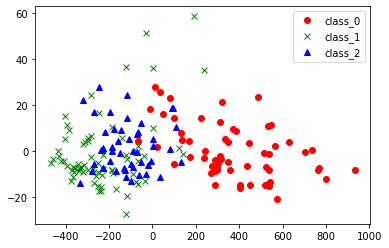

In [13]:
pca = PCA(n_components=2)
Xw2 = pca.fit_transform(Xw)
plt.plot(Xw2[yw==0,0], Xw2[yw==0,1],"ro", label = wine.target_names[0])
plt.plot(Xw2[yw==1,0], Xw2[yw==1,1],"gx", label = wine.target_names[1])
plt.plot(Xw2[yw==2,0], Xw2[yw==2,1],"b^", label = wine.target_names[2])
plt.legend()

## ナイーブベイズ

交差確認法で性能を評価します。

In [43]:
clf1 = GaussianNB()
scores = cross_val_score(clf1, Xw2, yw, cv=10)
print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std()*2:.2f})")

Accuracy: 0.73 (+/- 0.17)


### ロジスティック識別

In [42]:
clf2 = LogisticRegression()
scores = cross_val_score(clf2, Xw2, yw, cv=10)
print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std()*2:.2f})")

Accuracy: 0.69 (+/- 0.17)


若干ナイーブベイズの方が性能が良いように見えますが、ベースの性能が低いので、この問題は統計的アプローチが適していない問題であると見ることができます。

## breast-cancerデータの識別

In [16]:
bc = load_breast_cancer(as_frame=True)
print(bc.DESCR)
Xb = bc.data
yb = bc.target

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

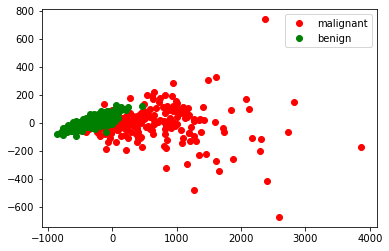

In [19]:
pca = PCA(n_components=2)
Xb2 = pca.fit_transform(Xb)
plt.plot(Xb2[yb==0,0], Xb2[yb==0,1],"ro", label = bc.target_names[0])
plt.plot(Xb2[yb==1,0], Xb2[yb==1,1],"go", label = bc.target_names[1])
plt.legend()

In [44]:
clf1 = GaussianNB()
scores = cross_val_score(clf1, Xb2, yb, cv=10)
print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std()*2:.2f})")

Accuracy: 0.90 (+/- 0.06)


In [45]:
clf2 = LogisticRegression()
scores = cross_val_score(clf2, Xb2, yb, cv=10)
print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std()*2:.2f})")

Accuracy: 0.93 (+/- 0.06)


散布図を見るとそれぞれのデータがある程度固まって分布しているので、統計的アプローチでもある程度の性能が出ることが期待されます。しかし、一部重なりがあるので、このようなクラスがあまりきれいに分離されていないデータでは、生成モデルであるGaussianNBよりも識別モデルであるLogisticRegressionのほうが一般に正解率が高くなる傾向があります。